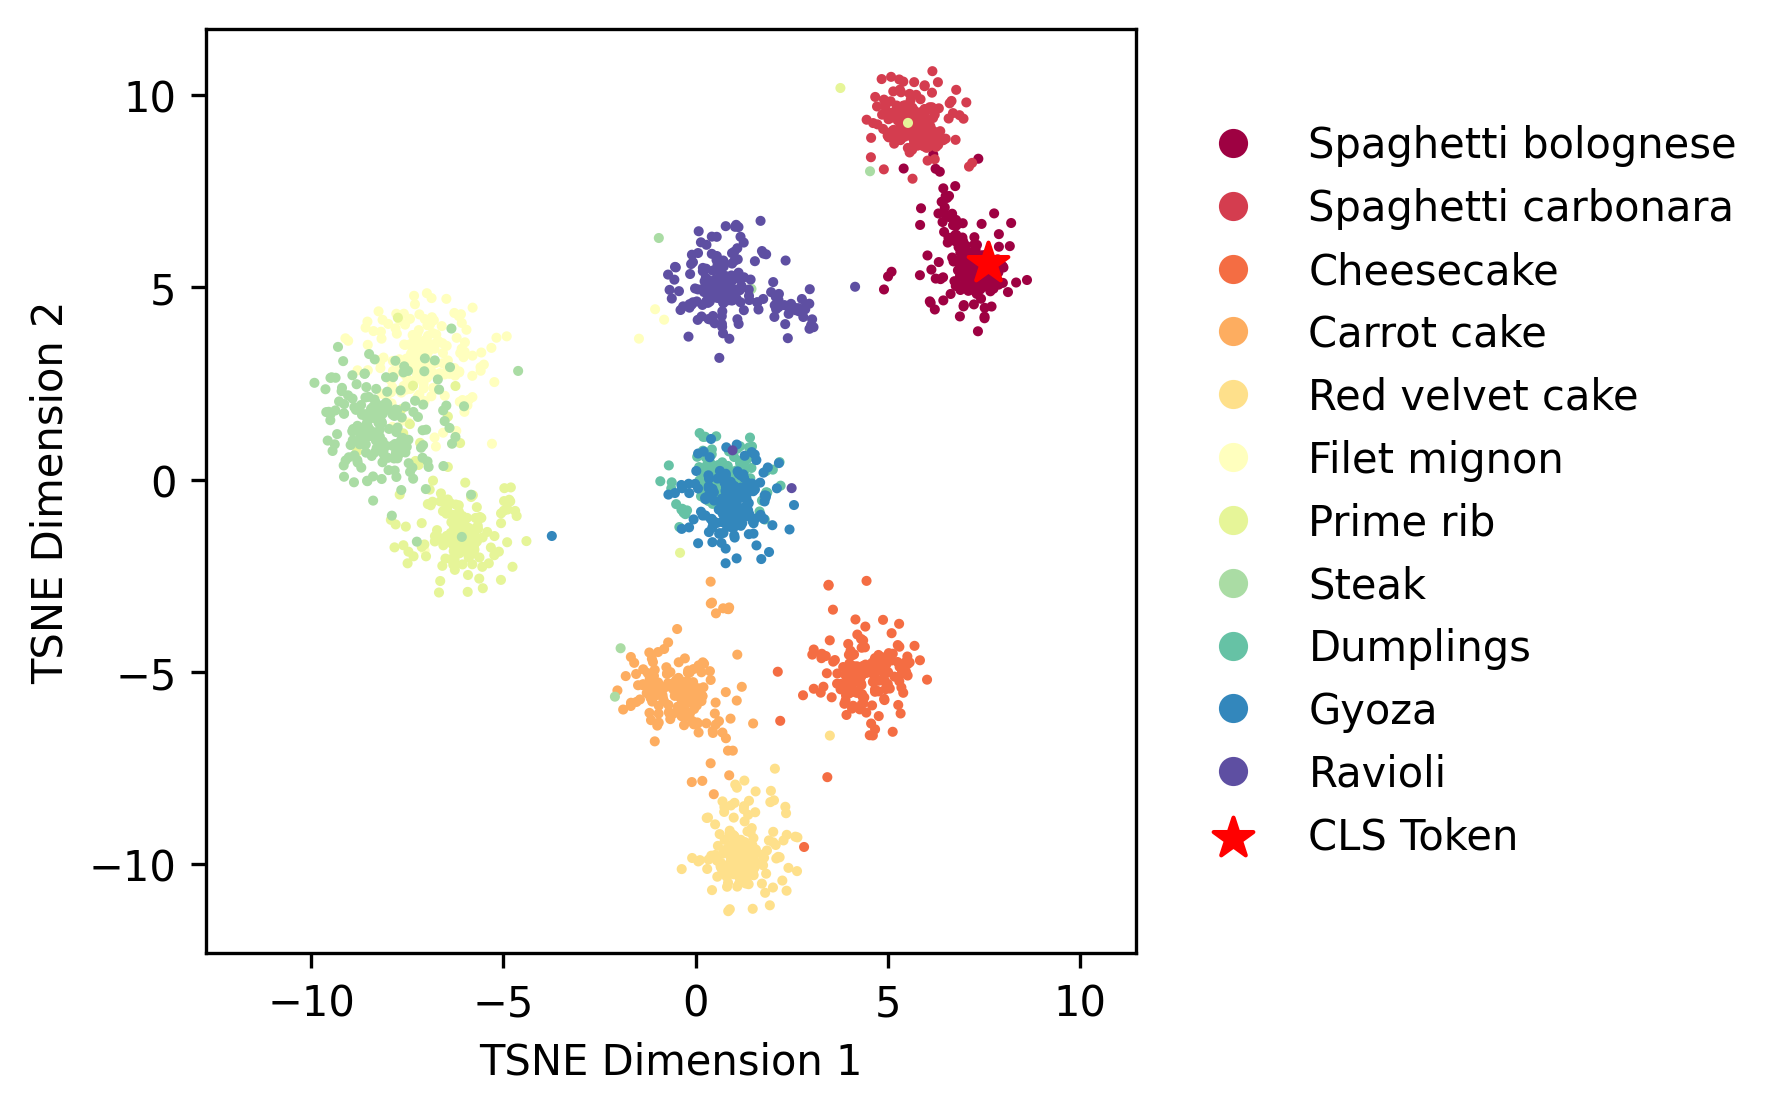

In [45]:
import matplotlib.pyplot as plt
import time
import pandas as pd
from PIL import Image
import numpy as np
Class_list = [90,91,17,14,83,37,79,93,32,52,82]
labels = np.repeat([i for i in range(len(Class_list))], 200)

df = pd.read_csv('./experiment/vit_evidence_complex.csv')
embedding = df.values
plot_fuse=True
if plot_fuse:
    #A_prompt = embedding[-2]
    B_prompt = embedding[-1]
    embedding = embedding[:-1]

fig, ax = plt.subplots(figsize=(4, 4),dpi=300)
scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=labels,
    cmap='Spectral',
    s=2
)
if plot_fuse:
    #scatter2 = ax.scatter(A_prompt[0], A_prompt[1], c='r', marker='*', s=100,label='Evidence A')
    scatter3 = ax.scatter(B_prompt[0], B_prompt[1], c='r', marker='*', s=100,label='Cls Token')
# 设置图形属性
ax.set_aspect('equal', 'datalim')
ax.set_xlabel('TSNE Dimension 1', fontsize=10)
ax.set_ylabel('TSNE Dimension 2', fontsize=10)

with open(f'food-101.txt', 'r', encoding='utf-8') as f:
    # 逐行读取，并去除末尾的换行符
    idx_to_label = [line.strip() for line in f.readlines()]

# 获取原始图例元素
legend_elements = scatter.legend_elements()[0]
legend_labels = [f'{idx_to_label[Class_list[i]]}' for i in range(len(Class_list))]

if plot_fuse:
    # 使用空的scatter创建红色点的图例元素
    legend_elements = list(legend_elements)
    # legend_elements.extend([scatter2, scatter3])
    # legend_labels.extend(['Evidence\nSpaghetti bolognese', 'Evidence\nCheesecake'])
    legend_elements.extend([scatter3])
    legend_labels.extend(['CLS Token'])

# ---------- 这里是修改图例位置的关键代码 ----------
ax.legend(
    handles=legend_elements,
    labels=legend_labels,
    loc='center left',         # 将图例的左边中点作为锚点
    bbox_to_anchor=(1.02, 0.5), # 将锚点放置在绘图区域右侧外部、垂直居中的位置
    frameon=False,
)

# ----------------------------------------------------
# 自动调整布局，防止图例被裁剪
#plt.tight_layout()
# 显示图形
plt.savefig('./experiment/vit_evidence_complex.png', dpi=300, bbox_inches='tight')
plt.show()